# Sentiment Analysis of COVID-19 Vaccine Tweets

![vaccine](media/twitter_photo_moderna.jpeg)

![kaggle_preview](media/kaggle_preview.png)

In [ ]:
##################################################################################
#       author:     Sejal Dua                                                    #
#         date:     03/15/2021                                                   #
#  data source:     https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets    #
#      credits:     Ariwan Sri Setya, Tom Whelan, Gabriel Preda                  #
##################################################################################

## Data Access

In [2]:
# installs
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker

[nltk_data] Downloading package brown to /home/codespace/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [4]:
df = pd.read_csv("vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
df

id                                         user_name  \
0      1340539111971516416                                        Rachel Roh   
2      1337858199140118533                                          eli🇱🇹🇪🇺👌   
6      1337851215875608579                                 Gunther Fehlinger   
9      1337842295857623042                                      Ch.Amjad Ali   
10     1337841934170255365                                       Tamer Yazar   
...                    ...                                               ...   
27802  1368226947822653442  Andy The legally and popularly elected Gardener.   
27804  1368224770995675139                                        🌎 Sarwar 🌐   
27806  1368224272267829256                                 Workout Solutions   
27807  1368218905353859081                                      William Owen   
27808  1368212131422814208                                 Workout Solutions   

                        user_location  \
0           La Crescenta-Montrose, CA   
2                            Your Bed   
6         Austria, Ukraine and Kosovo   
9                           Islamabad   
10                      Turkey-Israel   
...                               ...   
27802                 Untidied States   
27804                               E   
27806  Toronto, Canada  and Worldwide   
27807                  Moscow, Russia   
27808  Toronto, Canada  and Worldwide   

                                        user_description         user_created  \
0      Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                         heil, hydra 🖐☺  2020-06-25 23:30:28   
6      End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9      #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10     Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   
...                                                  ...                  ...   
27802                       merciless infj door slammer.  2019-01-01 23:12:42   
27804                                     W pirsarwarras  2009-07-01 00:18:11   
27806  George Tsanis – Workout Solutions Health and F...  2010-09-20 17:01:08   
27807  | political | cats | bikes | civil rights | te...  2009-03-16 03:03:13   
27808  George Tsanis – Workout Solutions Health and F...  2010-09-20 17:01:08   

       user_followers  user_friends  user_favourites  user_verified  \
0                 405          1692             3247          False   
2                  10            88              155          False   
6                2731          5001            69344          False   
9                 671          2368            20469          False   
10               1302            78              339          False   
...               ...           ...              ...            ...   
27802              93            83             9876          False   
27804            1685          1439             6268          False   
27806            1164           172             1358          False   
27807            3962          2594            51923          False   
27808            1164           172             1358          False   

                      date                                               text  \
0      2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
2      2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6      2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
9      2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   
10     2020-12-12 19:29:07  while deaths are closing in on the 300,000 mar...   
...                    ...                                                ...   
27802  2021-03-06 15:48:19  If you want to know how much antivaxx disinfor...   
27804  2021-03-06 15:39:40  #BREAKING \n#Venezuela \nVenezuelan President ...   
27806  2021-03-

In [5]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(16180, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 0 to 27808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                16180 non-null  int64 
 1   user_name         16180 non-null  object
 2   user_location     16180 non-null  object
 3   user_description  16180 non-null  object
 4   user_created      16180 non-null  object
 5   user_followers    16180 non-null  int64 
 6   user_friends      16180 non-null  int64 
 7   user_favourites   16180 non-null  int64 
 8   user_verified     16180 non-null  bool  
 9   date              16180 non-null  object
 10  text              16180 non-null  object
 11  hashtags          16180 non-null  object
 12  source            16180 non-null  object
 13  retweets          16180 non-null  int64 
 14  favorites         16180 non-null  int64 
 15  is_retweet        16180 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


# Data Wrangling & Preprocessing

In [7]:
df.drop(columns=['id'], inplace=True)

In [8]:
df = df.drop_duplicates('text')
print(df.shape)

(16170, 15)


In [9]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                     user_description         user_created  \
0   Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                      heil, hydra 🖐☺  2020-06-25 23:30:28   
6   End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9   #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10  Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   

    user_followers  user_friends  user_favourites  user_verified  \
0              405          1692             3247          False   
2               10            88              155          False   
6             2731          5001            69344          False   
9              671          2368            20469          False   
10            1302            78              339          False   

                   date                                               text  \
0   2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
2   2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6   2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
9   2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   
10  2020-12-12 19:29:07  while deaths are closing in on the 300,000 mar...   

                                             hashtags               source  \
0                                  ['PfizerBioNTech']  Twitter for Android   
2   ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
6                                     ['vaccination']      Twitter Web App   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...      Twitter Web App   
10                      ['PfizerBioNTech', 'Vaccine']      Twitter Web App   

    retweets  favorites  is_retweet  
0          0          0       False  
2          0          0       False  
6          0          4       False  
9          0          0       False  
10         0          0       False

In [10]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                     user_description         user_created  \
0   Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                      heil, hydra 🖐☺  2020-06-25 23:30:28   
6   End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9   #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10  Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   

    user_followers  user_friends  user_favourites  user_verified        date  \
0              405          1692             3247          False  2020-12-20   
2               10            88              155          False  2020-12-12   
6             2731          5001            69344          False  2020-12-12   
9              671          2368            20469          False  2020-12-12   
10            1302            78              339          False  2020-12-12   

                                                 text  \
0   Same folks said daikon paste could treat a cyt...   
2   #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6   it is a bit sad to claim the fame for success ...   
9   #CovidVaccine \n\nStates will start getting #C...   
10  while deaths are closing in on the 300,000 mar...   

                                             hashtags               source  \
0                                  ['PfizerBioNTech']  Twitter for Android   
2   ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
6                                     ['vaccination']      Twitter Web App   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...      Twitter Web App   
10                      ['PfizerBioNTech', 'Vaccine']      Twitter Web App   

    retweets  favorites  is_retweet  
0          0          0       False  
2          0          0       False  
6          0          4       False  
9          0          0       False  
10         0          0       False

# Exploratory Data Analysis (EDA)

In [38]:
df.query("user_followers >= 25", inplace=True)
df.query("user_followers <= 10000", inplace=True)

In [39]:
df.describe()

user_followers  user_friends  user_favourites      retweets  \
count    12648.000000  12648.000000     12648.000000  12648.000000   
mean      1471.191018   1106.927736     15897.247075      1.296252   
std       1916.688874   1402.833645     38252.496194     12.438837   
min         25.000000      0.000000         0.000000      0.000000   
25%        206.000000    197.000000       587.000000      0.000000   
50%        637.000000    567.000000      3453.000000      0.000000   
75%       1909.000000   1381.250000     14002.000000      1.000000   
max       9942.000000  10890.000000    686342.000000    922.000000   

          favorites      polarity  subjectivity  
count  12648.000000  12648.000000  12648.000000  
mean       6.272059      0.108924      0.273654  
std       55.342062      0.244409      0.300885  
min        0.000000     -1.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.200000  
75%        3.000000      0.245455      0.500000  
max     3636.000000      1.000000      1.000000

<Axes: >

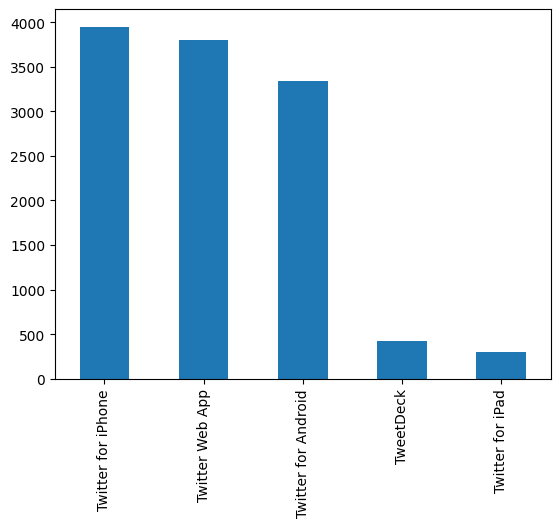

In [40]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

<Axes: >

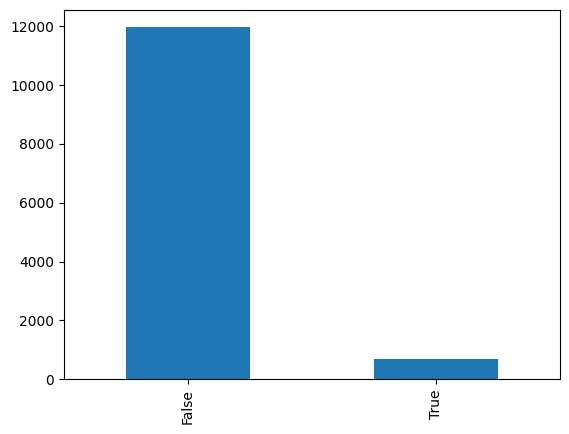

In [41]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [42]:
df[df['user_verified'] == True].head()

user_name       user_location  \
17              ILKHA             Türkiye   
84   Genevieve Reaume         Oregon, USA   
86   Genevieve Reaume         Oregon, USA   
95        Evan Webeck             Oakland   
101   Julie Dzerowicz  Davenport, Toronto   

                                                                                                                    user_description  \
17                                                                                    Official Twitter account of Ilke News Agency /   
84     Emmy-award winning @KATUnews reporter • shootin' for the moon • #miz • #pdx • formerly @kdrv & @komunews • tweets are my own.   
86     Emmy-award winning @KATUnews reporter • shootin' for the moon • #miz • #pdx • formerly @kdrv & @komunews • tweets are my own.   
95   S̶p̶o̶r̶t̶s̶ coronavirus reporter for @mercnews/@EastBayTimes. Formerly @seattletimes ⛰. Contact: ewebeck@bayareanewsgroup.com.   
101                                                                            Your Member of Parliament for Davenport. #DavenportTO   

            user_created  user_followers  user_friends  user_favourites  \
17   2015-05-22 08:31:12            4056             6                3   
84   2015-06-22 18:41:01            4276          1704             5877   
86   2015-06-22 18:41:01            4276          1704             5877   
95   2013-12-02 20:20:02            1296           543            10844   
101  2013-10-06 21:34:47            8131           685             3066   

     user_verified        date  \
17            True  2020-12-12   
84            True  2020-12-14   
86            True  2020-12-14   
95            True  2020-12-14   
101           True  2020-12-14   

                                                                                                                                               text  \
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   
84     The state is supposed to get 35,100 doses total of the #PfizerBioNTech vaccine this week.\nThe remained 30,225 will… https://t.co/c8wzudbpUT   
86     #BREAKING - just in from @OHAOregon on #COVID19 #vaccine:\n-"Legacy Health is the first registered COVID-19 vaccine… https://t.co/bUnTxDGqzZ   
95   There is some good news: The first doses of the #PfizerBioNTech vaccine arrived in California last night.\n\nGov. Gav… https://t.co/cB3p7CivgW   
101    Last night, the first #COVID19Vaccines arrived in Canada and as we speak, the first of the vaccines are being admin… https://t.co/TxsCWyC58j   

                                      hashtags           source  retweets  \
17   ['Iran', 'coronavirus', 'PfizerBioNTech']        TweetDeck         3   
84                          ['PfizerBioNTech']  Twitter Web App         0   
86          ['BREAKING', 'COVID19', 'vaccine']  Twitter Web App         1   
95                          ['PfizerBioNTech']        TweetDeck         0   
101                        ['COVID19Vaccines']        TweetDeck         4   

     favorites  is_retweet  polarity  subjectivity  
17           5       False  0.068182      0.260606  
84           0       False  0.000000      0.750000  
86           6       False  0.250000      0.333333  
95           1       False  0.316667      0.333333  
101         15       False  0.166667      0.244444

In [43]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
20575                      It is tough when have to play the sauve Amrikan doctor but ur desi Lahore genes start acting up #Covaxin https://t.co/ZUygPW4WGd   
19383                                                                                  Covid booster: be aware\n\n#COVID19 #Moderna https://t.co/IDoP2CsK31   
20967                    Bharat Biotech Announces Phase 3 Results of COVAXIN\nThe Vaccine Demonstrates Interim Clinical Efficacy of 81%.\n#vaccine #covaxin   
9284           Israel banned the entry of 2000 shots of #SputnikV vaccine destined for #COVID19 front-liners in #Gaza hospitals sa… https://t.co/eZFy25Sf0Y   
183          Welcoming the 1st #COVID19vaccines to 🇨🇦 tonight!\n\nThe 1st 30K doses of #PfizerBioNTech are arriving across the cou… https://t.co/40UMur6yoO   
21584       Today Dr @Swamy39 &amp; Mrs Roxna Swamy ji took Swadeshi Vaccine #Covaxin #COVID19 of Bharat Biotech @BharatBiotech at… https://t.co/3YiEsxTNmk   
3004   🇨🇦 has received &amp; distributed over half a million #PfizerBioNTech &amp; #Moderna vaccines w/ deliveries continuing week… https://t.co/3b7OwsX9mb   
14355         "Prime Minister Narendra Modi" 𝗧𝗼𝗼𝗸 𝗙𝗶𝗿𝘀𝘁 𝗗𝗼𝘀𝗲 of The #COVID19Vaccine at AIIMS ‼\n\n▪️𝗚𝗮𝗺𝗰𝗵𝗮 from Assam in The Neck.… https://t.co/nFtkJEeMTz   
22267           You’ll LOVE it. https://t.co/VKL1ZxZSKh\n\nGet linked: https://t.co/IN9IezZ3GH\n\n#COVID19 #CovidReliefBill #COVID… https://t.co/fxLD3iFIg8   
25541                  My second dose of the vaccine for Covid-19. And my @Flamengo was with me. #vaccination #vaccinated #COVID19… https://t.co/NoScRRAgLA   

             date             user_name      user_location  \
20575  2021-03-03           Manoj Rawat          New Delhi   
19383  2021-03-02             Ben Stein  Beverly Hills, CA   
20967  2021-03-03     Ridhima Bhatnagar              Delhi   
9284   2021-02-15  J. Shawa  جاسم الشوا    Gaza, Palestine   
183    2020-12-14           Anita Anand  Oakville, Ontario   
21584  2021-03-05        Tejas Navangul          Hindustan   
3004   2021-01-10           Anita Anand  Oakville, Ontario   
14355  2021-03-01            कटु-सत्य 🙃      Mumbai, India   
22267  2021-03-06         John S. Weiss      New York City   
25541  2021-03-06       Miguel Torneire     St. Peters, MO   

                                       hashtags  favorites  retweets  
20575                               ['Covaxin']       3636       922  
19383                    ['COVID19', 'Moderna']        734       446  
20967                    ['vaccine', 'covaxin']        400       441  
9284            ['SputnikV', 'COVID19', 'Gaza']        521       438  
183       ['COVID19vaccines', 'PfizerBioNTech']       1979       284  
21584                    ['Covaxin', 'COVID19']       3145       263  
3004              ['PfizerBioNTech', 'Moderna']        790       230  
14355                        ['COVID19Vaccine']        181       151  
22267   ['COVID19', 'CovidReliefBill', 'COVID']         45       127  
25541  ['vaccination', 'vaccinated', 'COVID19']       1380       119

In [44]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
25   No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432   
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   
6       it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
301    I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU   
18     .@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0   
16      UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW   
21     Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE   
30            @ZubyMusic 6 deaths so far. \nIt's only death, nothing to worry about then 🤔\n#CovidVaccines\n#Pfizervaccine… https://t.co/HkGTDM5J3f   
299              #vaccine #Pfizervaccine #PfizerBioNTech WHAT'S IN THIS VACCINE? #Pfizer is NOT 100% transparent about it.… https://t.co/I3aecCJaCy   
300    It is coming. Vaccine will be here soon! So excited... #CovidVaccine #covid19 #Pfizervaccine #PfizerBioNTech #maskup https://t.co/NjH8ZSp1to   

           date                 user_name                user_location  \
25   2020-12-12           Devan Surendran          Nottingham, England   
17   2020-12-12                     ILKHA                      Türkiye   
6    2020-12-12         Gunther Fehlinger  Austria, Ukraine and Kosovo   
301  2020-12-12  Taryn Schuelke, CT, CCLS                  Houston, TX   
18   2020-12-12     Braderz73🌹#GTTO 🇪🇺 🇬🇧                  Bristol, UK   
16   2020-12-12        STOPCOMMONPASS.ORG                       Global   
21   2020-12-12         Richard Dunne, MD                Rochester, NY   
30   2020-12-12               Andy Thomas                       London   
299  2020-12-12               can't think       @datop, earth sky moon   
300  2020-12-12           Bruno Rodrigues                  Houston, TX   

                                                                                                 hashtags  \
25                                                      ['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']   
17                                                              ['Iran', 'coronavirus', 'PfizerBioNTech']   
6                                                                                         ['vaccination']   
301                                                                    ['CovidVaccine', 'PfizerBioNTech']   
18                                                                                       ['CovidVaccine']   
16   ['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']   
21                                                                                     ['PfizerBioNTech']   
30                                                                     ['CovidVaccines', 'Pfizervaccine']   
299                                              ['vaccine', 'Pfizervaccine', 'PfizerBioNTech', 'Pfizer']   
300                              ['CovidVaccine', 'covid19', 'Pfizervaccine', 'PfizerBioNTech', 'maskup']   

     favorites  retweets  
25          10         1  
17           5         3  
6            4         0  
301          4         2  
18           3         3  
16           2         2  
21           2         0  
30           2         0  
299          2         0  
300          2         0

# Sentiment Analysis

We will be using the `TextBlob` library to perform sentiment analysis on the tweets in our dataset. `TextBlob` provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. That said, there are numerous other packages with similar capabilities that are worth exploring, including `sklearn`, `nltk`, `vader`, `allennlp`, and more.

Let's see some short examples!

In [45]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [46]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [47]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [48]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [29]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [49]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

user_name                user_location  \
0           Rachel Roh    La Crescenta-Montrose, CA   
6    Gunther Fehlinger  Austria, Ukraine and Kosovo   
9         Ch.Amjad Ali                    Islamabad   
10         Tamer Yazar                Turkey-Israel   
16  STOPCOMMONPASS.ORG                       Global   

                                                                                                                                                    user_description  \
0                                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
6   End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped   
9                                        #ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad   
10     Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram :  tamervisits -   
16                                                                'Trust' is not carte-blanche for erosion of our liberty, privacy, & the pursuit of global control.   

           user_created  user_followers  user_friends  user_favourites  \
0   2009-04-08 17:52:46             405          1692             3247   
6   2013-06-10 17:49:22            2731          5001            69344   
9   2012-11-12 04:18:12             671          2368            20469   
10  2009-09-17 16:45:16            1302            78              339   
16  2020-10-25 20:33:33             406           176              479   

    user_verified        date  \
0           False  2020-12-20   
6           False  2020-12-12   
9           False  2020-12-12   
10          False  2020-12-12   
16          False  2020-12-12   

                                                                                                                                              text  \
0                                                Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
6      it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
9   #CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w   
10  while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP   
16     UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW   

                                                                                                hashtags  \
0                                                                                     ['PfizerBioNTech']   
6                                                                                        ['vaccination']   
9                ['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']   
10                                                                         ['PfizerBioNTech', 'Vaccine']   
16  ['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']   

                 source  retweets  favorites  is_retweet  polarity  \
0   Twitter for Android         0          0       False      0.00   
6       Twitter Web App         0          4       False     -0.10   
9       Twitter Web App         0          0       False      0.00   
10      Twitter Web App         0          0       False      0.25   
16      Twitter Web App         2          2       False      0.00   

    subjectivity  
0       0.125000  
6       0.500000  
9

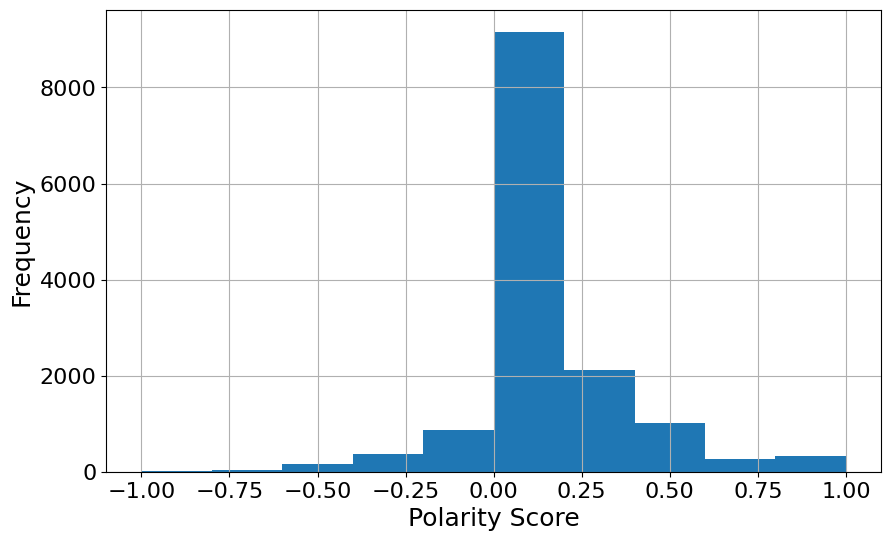

In [31]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./figures/polarity_hist.png")

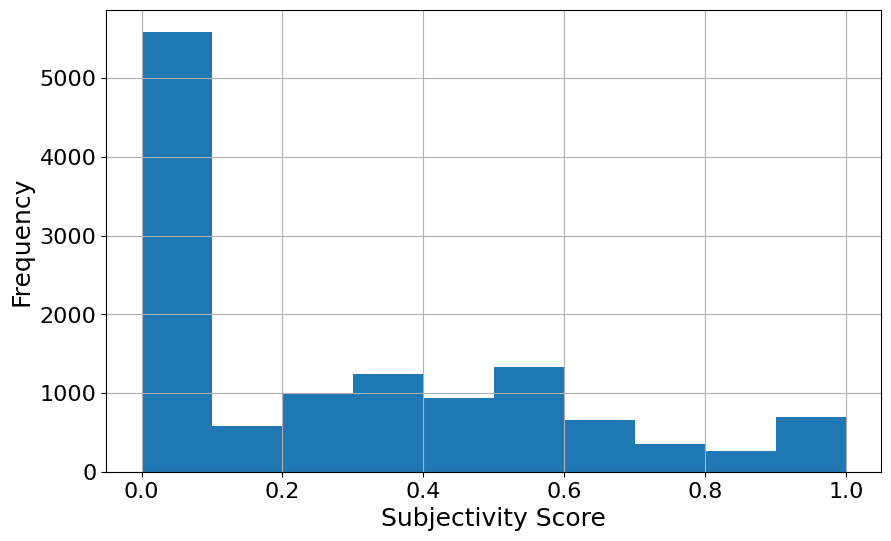

In [50]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./figures/subjectivity_hist.png")

## Inspection

In [33]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0  a patient who has beaten the #coronavirus &gt; “The worst thing was seeing the people around me die. I saw a lot of pe… https://t.co/ZIBoXBN4on   
1      #astrazenecavaccine The #eu have been disgusting in their approach to the #oxfordastrazeneca vaccine. The abuse of… https://t.co/vn5oyp90xm   
2                                                                               Hour 14 into #Moderna #vaccine, horrible body chills just started.   
3     Death of 23 people's in #Norway after receiving #PfizerBioNTech vaccine is pathetic and scarry too!! Autopsy report… https://t.co/N36GJTVDPP   
4    Day 4 w/#Moderna (shot 1)..\nugh, i'm miserable, but ironically i have never had any injection site pain or swelling… https://t.co/H8jo9i4wl8   
5                                                                      We are on day 3 of the worst headache of my life.\n\n#moderna #CovidVaccine   
6                Moderna #2 is done! 💉 So blessed to be fully vaccinated against this devastating virus. #vaccinated #500kdeaths #COVID19 #Moderna   
7     Got my #Moderna Covid-19 vaccine dose 2 yesterday and today I feel like crap! 🤕 I do feel blessed to have had the o… https://t.co/8WfXUodIJJ   
8          1/2 way vaccinated..arm soreness was the worst part. Are you getting the vaccine? Why or why not? \n\n#vaccine… https://t.co/rAilvvwQX5   
9     @SkyNews @SadiqKhan Get me #SputnikV then we'll talk... Otherwise jog on with your pathetic #Vaccine that does t wo… https://t.co/DkbFc5luTy   

   polarity  subjectivity  
0      -1.0           1.0  
1      -1.0           1.0  
2      -1.0           1.0  
3      -1.0           1.0  
4      -1.0           1.0  
5      -1.0           1.0  
6      -1.0           1.0  
7      -1.0           0.8  
8      -1.0           1.0  
9      -1.0           1.0

In [34]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                  The best gift for this #valentinesday2021. A gift for all.\n#valentinesdaygift #COVID19 #CoronaVaccine… https://t.co/T0Wh3jKSvr   
1      If you told the victims of @cbcnews about how #sputnikv could solve Canada's vax shortage, the BEST reply you will… https://t.co/BZGulUS4qu   
2                Send your best #vax #vaccination pic-                           all you #Desi #women out there #Vaccines… https://t.co/Yd0I7R5pxw   
3                                   Today, March 3, 2021 I thankfully received the #Moderna Covid vaccine part 1! Makes it a Great Day in my book!   
4     One of the best vaccines in the world, #SputnikV, has not been submitted for approval. Trudeau has no interest in a… https://t.co/2w31ju7ASy   
5  @les_politiques @bpolitics Scandalous that CDN's are being denied the best &amp; safest vaccine-#SputnikV?  R @CPC_HQ,… https://t.co/jsgHpDAbTJ   
6                                                                        @FT If it's not #sputnikV Negros in that country best be scared shitless!   
7                                                           #Turks are very proud of them ,\n#CovidVaccine #PfizerBioNTech https://t.co/SgwpyJDNUw   
8                                                            Making a great day greater—second #PfizerBioNTech dose is in! https://t.co/TGTRUiG31K   
9                    Best feeling when I got my #CovidVaccine let’s keep this going Florida! #vaccination #PfizerBioNTech… https://t.co/ou2wjV4lI9   

   polarity  subjectivity  
0       1.0          0.30  
1       1.0          0.30  
2       1.0          0.30  
3       1.0          0.75  
4       1.0          0.30  
5       1.0          0.30  
6       1.0          0.30  
7       1.0          1.00  
8       1.0          0.75  
9       1.0          0.30

In [35]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                       Thank you, @NC_Governor, for moving teachers up the vaccine list! #CapeFearValley #PfizerBioNTech… https://t.co/81CfYVEO6x   
1                    #KamalaHarris  says she suffered side effects of second dose of #Moderna  #vaccine  https://t.co/h3iAfx9l60 via @neweconomygr   
2  $MRNA #Moderna Moderna : 2021: a transformative financial year for the group: &gt;2021 guidance well ahead of expectat… https://t.co/ATJyRPp9rj   
3     The @EU_Commission approved a second contract with the pharmaceutical company #Moderna, which provides for an addit… https://t.co/8Sj4ZYsmcy   
4                                                             #Moderna forecasts $18bn in sales of #CovidVaccine this year https://t.co/y23Ia5qEGf   
5   💉\n\nChoice of #Moderna or #Pfizer for Californians. \n\n#cdnpoli\n#bcpoli\n#onpoli \n#abpoli\n#TrudeauVaccineFailure… https://t.co/iyz8rU1pY6   
6                                                                                                              @TheNationalNews And so is #Sinovac   
7     The Armed Forces of the Philippines (#AFP) on Thursday said #coronavirus disease 2019 (#Covid-19) inoculation is ma… https://t.co/3NHX6PzWzM   
8                 A container with #Sinovac #Coronavirus disease (#COVID19) vaccines from #China is being unloaded from a… https://t.co/Cm0dugpz0C   
9        🇪🇨#Ecuador in South America signs agreement with #China's #Sinovac for 2 million #COVID19 vaccines.\n\nSinovac's… https://t.co/pWWoZFBOO9   

   polarity  subjectivity  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  
5       0.0           0.0  
6       0.0           0.0  
7       0.0           0.0  
8       0.0           0.0  
9       0.0           0.0

In [36]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0               It’s been quite a day, but it’s done! I’m so happy ✅ #covax #vaccine #CovidVaccine #protected #Moderna… https://t.co/qFHo6YlXCD   
1   @JohnTory @211Central Mayor of Nice in France asks health authorities to permit him to buy Russia #COVID19 vaccine… https://t.co/A7Ez8OIcd4   
2   #Vaccine study volunteer, Michael Rouse, proudly shows his vaccine card after learning this month that he received… https://t.co/nP6pCL4JXj   
3        @Nadine_Writes Fabulous news! I received my 1st dose of #PfizerBioNTech on Saturday. Had a bit of a sore arm on Sunday but that’s all.   
4        #Diamond giant #Alrosa to donate #vaccines to #Angola, #Zimbabwe - #africa #covid19 #coronavirus #vaccination… https://t.co/VvMBmEflwK   
5  #Moderna side effects were terrible head aches and sore arm/injection site. The head aches may have been bc I was i… https://t.co/AWnTJP3LZB   
6    I'd also like to mention how proud I am of some of our #UK #universities to which I have a connection...I had the… https://t.co/G5cGzjLo8x   
7  Mayor of Nice in France asks health authorities to permit him to buy Russia #COVID19 vaccine #SputnikV, When will A… https://t.co/793CvzKp67   
8  @JohnTory Mayor of Nice in France asks health authorities to permit him to buy Russia #COVID19 vaccine #SputnikV, W… https://t.co/EiNqeYlhyq   
9                           So proud that I had my covid vaccine today. #oxfordastrazeneca #COVID19 #CovidVaccine #AstraZeneca #proud #StaySafe   

   polarity  subjectivity  
0       0.8           1.0  
1       0.6           1.0  
2       0.8           1.0  
3       0.5           1.0  
4       0.0           1.0  
5      -1.0           1.0  
6       0.8           1.0  
7       0.6           1.0  
8       0.6           1.0  
9       0.8           1.0

In [37]:
# let's inspect how many tweets there were with respect to time
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()
# fig.write_image("./figures/tweet_freq_over_time.png")

# Time-Series Sentiment Analysis

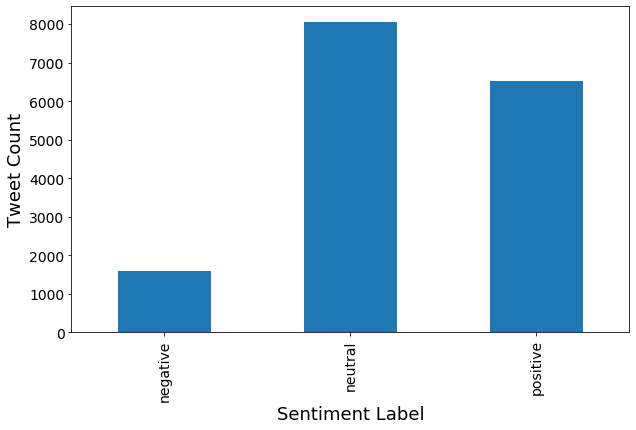

<Figure size 432x288 with 0 Axes>

In [30]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("./figures/sentiment_value_counts", bbox_inches='tight');

In [31]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0   2020-12-12     38  0.034952  0.631579   2.868421      0.227801
1   2020-12-13     52  0.055937  1.942308   7.500000      0.255696
2   2020-12-14     83  0.116874  4.698795  29.204819      0.267803
3   2020-12-15     87  0.094041  1.022989   7.333333      0.258078
4   2020-12-16     78  0.104020  1.000000   5.115385      0.248872
..         ...    ...       ...       ...        ...           ...
88  2021-03-10    465  0.098784  2.481720   9.987097      0.246851
89  2021-03-11    516  0.081946  2.232558   9.248062      0.253772
90  2021-03-12    467  0.108128  1.391863   8.509636      0.259496
91  2021-03-13    315  0.088139  3.161905  11.838095      0.290822
92  2021-03-14     83  0.091934  1.349398   3.060241      0.256714

[93 rows x 6 columns]

In [32]:
timeline.sort_values(by='polarity', ascending=False)

date  count  polarity  retweets  favorites  subjectivity
12  2020-12-24     70  0.184387  3.657143  17.842857      0.310656
31  2021-01-12     52  0.182608  0.961538   6.961538      0.271700
19  2020-12-31     38  0.169196  1.184211   7.342105      0.282442
16  2020-12-28     26  0.165737  1.461538   4.769231      0.292030
33  2021-01-14     64  0.163502  0.843750   6.531250      0.268629
..         ...    ...       ...       ...        ...           ...
55  2021-02-05     40  0.058663  0.325000   9.000000      0.195590
1   2020-12-13     52  0.055937  1.942308   7.500000      0.255696
35  2021-01-16     82  0.039450  9.670732  17.024390      0.262114
0   2020-12-12     38  0.034952  0.631579   2.868421      0.227801
49  2021-01-30     34  0.010938  2.352941  14.705882      0.402106

[93 rows x 6 columns]

In [33]:
df[df['date'].astype(str) == '2021-01-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

user_location        date  \
2416                Northern Ireland  2021-01-12   
2531             Nottingham, England  2021-01-12   
2952  Ragbag Of Reviews And Insights  2021-01-12   
3121               Corleone, Sicilia  2021-01-12   
3124                      London, UK  2021-01-12   
3128    Vienna, Dublin, & Cyberspace  2021-01-12   
3131                              UK  2021-01-12   
3132             South West, England  2021-01-12   
3133            Southampton, England  2021-01-12   
3134                         Belgium  2021-01-12   
3135                           Crewe  2021-01-12   
3136        Warrington, Cheshire, UK  2021-01-12   
3145                  United Kingdom  2021-01-12   
3146            GP Partner, Watford   2021-01-12   
3147              Khyber Pakhtunkhwa  2021-01-12   
3148  CPT SA Defending the underdog☑  2021-01-12   
3155                      Tucson, AZ  2021-01-12   
3255                        Anglesey  2021-01-12   
3256             Melbourne, Victoria  2021-01-12   
3258             Melbourne, Victoria  2021-01-12   
3263                   Oklahoma, USA  2021-01-12   
3264  London,UK + W.Balkans + Global  2021-01-12   
3265              Bucharest, Romania  2021-01-12   
3266         England, United Kingdom  2021-01-12   
3267                     Chicago, IL  2021-01-12   
3268      Silicon Valley, California  2021-01-12   
3270             Chichester, England  2021-01-12   
3271                     India | USA  2021-01-12   
3273                     📍NJ/PA, USA  2021-01-12   
3274                 In a Good Place  2021-01-12   
3279                          Cyprus  2021-01-12   
3282                              UK  2021-01-12   
3284                 London, England  2021-01-12   
3285                              UK  2021-01-12   
3287                     Houston, TX  2021-01-12   
3289        Oxfordshire & Birmingham  2021-01-12   
3293                         Tunisia  2021-01-12   
3294                             USA  2021-01-12   
3295                    Bellevue, WA  2021-01-12   
3298                   Nashville, TN  2021-01-12   
3299           A State of Depression  2021-01-12   
3302                    New York, NY  2021-01-12   
3303                         London   2021-01-12   
3304                      Durham, NC  2021-01-12   
3305                 California, USA  2021-01-12   
3310               Waterford Ireland  2021-01-12   
3311                          Israel  2021-01-12   
3312     Dubai, United Arab Emirates  2021-01-12   
3313                        Hungary   2021-01-12   
3314                   Edinburgh, UK  2021-01-12   
3315                         Greece   2021-01-12   
3316              Liverpool, England  2021-01-12   

                                                                                                                                                  text  \
2416                                           Delighted to receive my second vaccine today 👏🏻 #PfizerBioNTech #COVID19Vaccine https://t.co/QQOAwTG8tn   
2531     Had my COVID-19 vaccine on Friday 💉 and experienced most of the side effects #COVIDVaccination #PfizerBioNTech \n- h… https://t.co/8zGRzftQWM   
2952                  #EU Plans To Purchase 300-million More #Covid19 Vaccines https://t.co/E6CxrV4yHA #covidvaccines #Pfizer… https://t.co/AKQ3vS8Dgi   
3121                                         Just had my first #COVIDVaccination #COVID19 I am now 70% immortal #PfizerVaccine #PfizerBioNTech #Pfizer   
3124                                                                                                      Getting vaccinated today. ☺️ #PfizerBioNTech   
3128      @AvilaLipsett @jessica_anhold Woefully behind other countries. #Israel way ahead; smartly ordered #PfizerBioNTech i… https://t.co/OMTNQcGygC   
3131   #Covid-19 vaccines are from \n\n#PfizerBioNTech  --- ? -70C     £15\nUniversity of #Oxford and #AstraZeneca --   fridg… https://t.co/6sUEmVUToI   
3132      Had my first dose of #Pf

In [34]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [35]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

# Filter by Vaccy

In [36]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [37]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(5454, 18)


In [38]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(2604, 18)


In [39]:
astra_df, astra_timeline = filter_by_vaccy(df, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name  \
0                                    Ricarda Milstein   
1                                          Bart Kulpa   
2                                        Anurag Sinha   
3                                      EurAsian Times   
4                                       Michael Wynne   
5                                          India Post   
6                                          Ramon Denz   
7                                  Dr George Christos   
8                                🕷Financial Bear 3.5%   
9                                        Rose Webster   
10                                        Robert Neal   
11                                R. Ruth Linden, PhD   
12                                            Nevanji   
13                                    @WhatsYourViews   
14                             Intentional ⚘ Progress   
15  Party politics isn't working for anyone, anywhere   
16                                  Best Health 4 You   
17                    Umberto GAMBINI 🇪🇺🏴󠁧󠁢󠁳󠁣󠁴󠁿🇪🇺🇮🇹🇪🇺   
18                        Paul Vittles FMRS FAMI FRSA   
19                                   Marissa J. Smith   

                 user_location  \
0             Hamburg - Berlin   
1                   London, UK   
2               Ottawa, Canada   
3                       Global   
4                      Bahrain   
5             Fremont, CA, USA   
6                         Gaza   
7     Perth, Western Australia   
8         #KeepFightingMichael   
9                       Canada   
10                     Germany   
11               San Francisco   
12                    Zimbabwe   
13             UK, Birmingham.   
14    DÉCLASSÉ  INTELLECTUELLE   
15       Wales, United Kingdom   
16                Planet Earth   
17        Brussels and Sappada   
18               York, England   
19  San Francisco Bay Area, CA   

                                                                                                                                                     user_description  \
0                                                      Health Economist @unihh/@hche_uhh. Passion for Asia and baroque music. All views are my own. RT ≠ endorsement.   
1                                              Globally-minded person working for an international law firm. Enjoy debate on law, politics and foreign affairs 🇪🇺🇵🇱🇬🇧   
2                                                                                  International Affairs; Itinerant ✈️🇲🇹 ✈️ 🇬🇧 ✈️ 🇶🇦✈️ 🇵🇱 ✈️ 🇩🇪 ✈️ 🇪🇸 ✈️ 🇦🇹 ✈️🇨🇭✈️ 🇨🇾   
3                    EurAsian Times provides Latest International News and Analysis besides Empowering People to Report, Review & Publish Online Consumer Complaints.   
4                                                                                                        Views and opinions are my own. You are entitled to your own.   
5        Refresh yourself every morning with India Post news coverage Use#IndiaPostNewsPaper to get featured\nContribute your articles here: https://t.co/yuBlQ7dX1S…   
6                                   Free Palestine - Friend of Muslims - ANTI Racism and Fascism - can't stand stupid people - 9/11 was an inside job!\nAKASHIC VAULT   
7                         theoretical physicist/mathematician/neuroscientist/author artist/builder/architectural artist\n2020s: #covid19 covidologist, go4 #zerocovid   
8                   Pro the EU for the opportunities it offers citizens.Lower tax,less authority, power to the people not politicians. Love coffee,running, Formula-E   
9            I question everything. Fighter for the underdog. Exposing the minority report. Your title does not automatically = more knowledgeable, wise, or ethical.   
10                                                                           I may disapprove of what you say, but I will defend unto the death your right to say it!   
11      #HealthAdvocate working with diverse clients in #SFBayArea, #Cal, #USA to navigate #healthcare 

In [40]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name                 user_location  \
0                      Prasenjit Bhakat       Jhargram,W Bengal,India   
1                      Prasenjit Bhakat       Jhargram,W Bengal,India   
2                                Balaji                     Bengaluru   
3             Dilip Jain | दिलीप जैन 🇮🇳              Bengaluru, India   
4                        Balaji Ganesan              Bengaluru, India   
5                         #SETTARGETS 🎯               London, England   
6                            NAV BHARAT              New Delhi, India   
7                         ब्रह्मराक्षस👹         Gorakhpur & New Delhi   
8                           MaryRobotic     California, United States   
9                          Jayraj Patil  United States of Maharashtra   
10                     Prasenjit Bhakat       Jhargram,W Bengal,India   
11                        🇮🇳#Chanakya🇮🇳                        Bharat   
12                              Abhinav                        India    
13                        Hariom tiwari                 Bhopal, India   
14                      Manisha Awasthi                  Planet Earth   
15  आन्दोलन जीवी Dr. Rahul Netragaonkar                   Pune, India   
16                     Prasenjit Bhakat       Jhargram,W Bengal,India   
17                      Hilary Whiteman          Brisbane, Queensland   
18                          CKMKB💥PKMKB                भारतवर्ष/India   
19                              PACO🇵🇷➐                   Puerto Rico   

                                                                                                                                                   user_description  \
0   Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.   
1   Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.   
2                                                                                                                   Classical Liberal. Wry wit, that usually fails.   
3                                                             Entrepreneur ● Love Cooking ● Blessed To Be Followed By PM Narendra Modi & Sh Amit Shah ● #JaiHind 🇮🇳   
4                                                                             Engineer @IBMResearch. Interested in Knowledge Graphs, NLP and Information Retrieval.   
5                                  ⏳ It's a marathon, not a sprint. 💎 Do your own DD and #TAKEPROFIT —— $IDEX $OCGN $CBBT $NIO $ACIC $LAC $LTMCF ⚡️ $LINK $ETH $BTC   
6                                                                        जाति 👉 प्रातः- शूद्र || फिर ब्राह्मण || फिर वैश्य || और देशद्रोहियों के लिए सदैव क्षत्रिय।   
7        ∣ ɴᴀᴛɪᴏɴ ғɪʀsᴛ 🇮🇳 |\n॥एकोऽहम् द्वितीयो नास्ति, न भूतो न भविष्यति॥\n#DelhiUniversity (Hons.) Chemistry⚗\n| Rajdhanian | In Search of My Destiny ∣ memes❤️ |   
8    Mask-loving, Trump-hating liberal\nopposed to genetic vaccines🌲🌲\nWarp Speed denied U.S. access \nto traditional vaccines.\nUntil a vaccine there's Ivermectin   
9                                                      #Engineer #Banker #BusinessAnalyst #Analyticalmind #Politicallyaware #FulltimeDevils #Kolhapurkar #Mumbaikar   
10  Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.   
11                                                                                                                          नित्य सत्य के खोज में... \n\n\n- भारतीय   
12                                                                                    Innovating technology | Business enthusiast | Tweeting in personal capacity |   
13                                                                                                                                       CARTOONIST, ACTOR,& W

# Wordclouds

In [41]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sejaldua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sejaldua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Simple

(-0.5, 999.5, 499.5, -0.5)

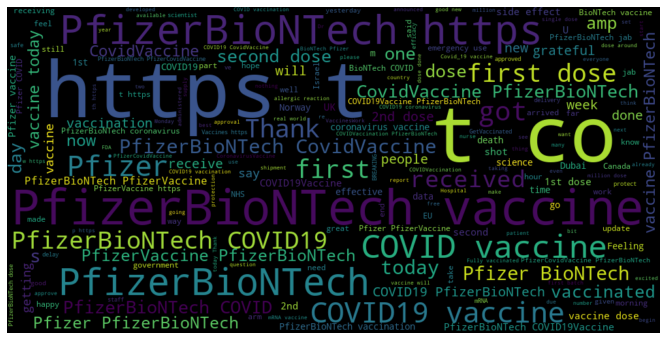

In [42]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

## Advanced

In [43]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

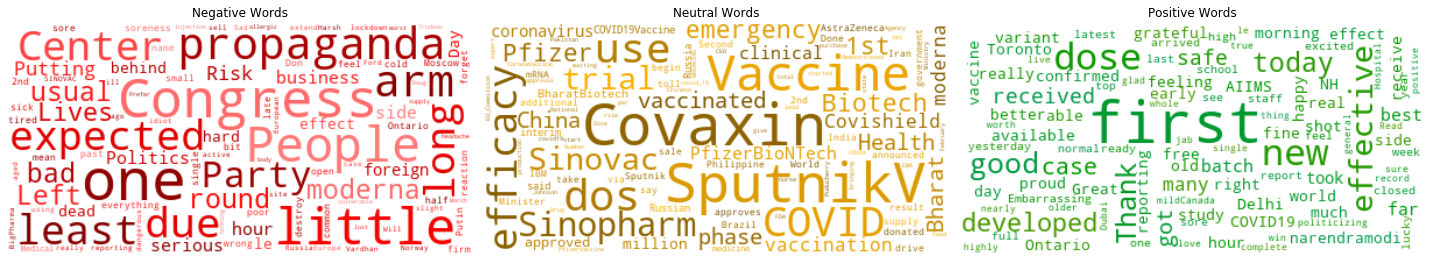

In [44]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")

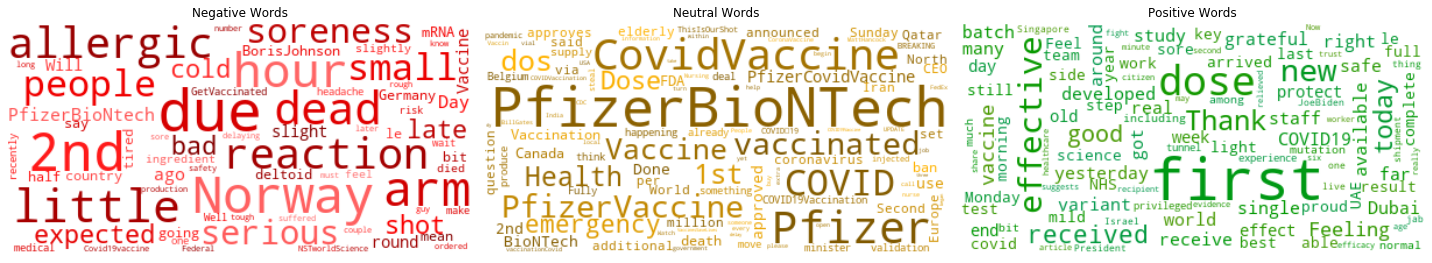

In [45]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizy_sentiment_wordclouds.png", bbox_inches="tight")

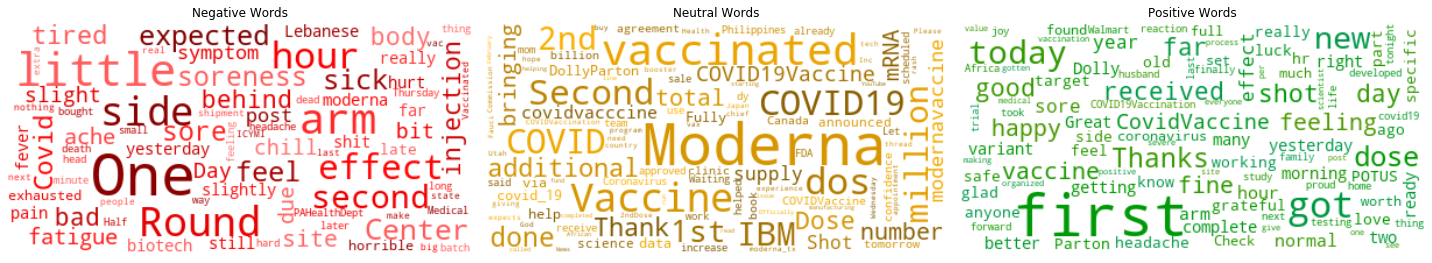

In [46]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("moderna_sentiment_wordclouds.png", bbox_inches="tight")

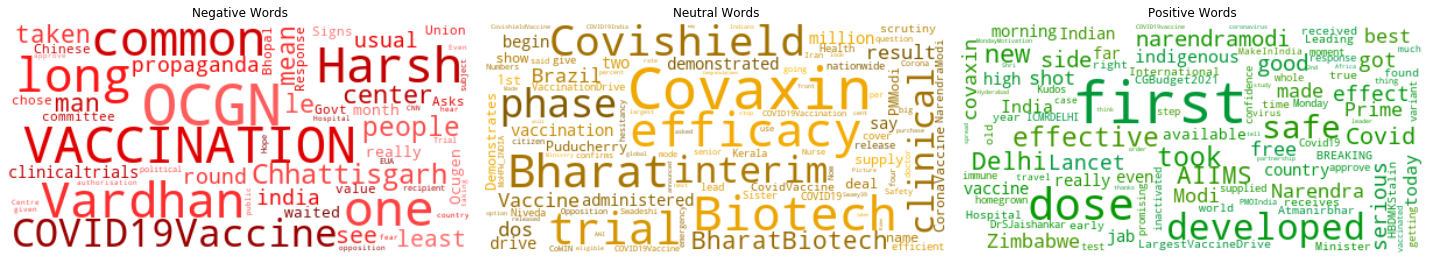

In [47]:
wordcloud_df = covaxin_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("covaxin_sentiment_wordclouds.png", bbox_inches="tight")

# Extension Ideas

* Use the  `tweepy` [API](https://docs.tweepy.org/en/latest/) to get tweets about the Johnson & Johnson Vaccine, and apply sentiment analysis onto them.
* Which hashtags are people using? Is the use of hashtags correlated with higher like counts and/or retweet counts?
* Analyze the faction of the tweets that include URLs. Do tweets with URLs have primarily neutral sentiments?
* What are verified Twitter users saying about the COVID-19 vaccine?
* What are people saying with respect to side effects? Which vaccine has the worst side effects?
* Correlate the COVID-19 World Vaccination Progress dataset with this sentiment analysis to monitor how attitudes are changing towards the vaccine as the rollout continues.
